<a href="https://colab.research.google.com/github/GabrielaGuayara/Open-Data-Bootcamp/blob/main/GG__Day_2_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import requests as re
import seaborn as sns
from tqdm.auto import tqdm
import matplotlib.pyplot as plt


import plotly
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px

# Retrieve Data

In [ ]:
ROOT = "https://data.cityofnewyork.us/resource/h9gi-nx95.json" # https://data.cityofnewyork.us/resource/h9gi-nx95.json
LIMIT = 1000000 # 1000000
YEAR = 2022
URL = f"{ROOT}?$limit={LIMIT}&$where=crash_date between '{YEAR}-01-01T00:00:00' and '{YEAR}-12-31T00:00:00'"

response = re.get(URL)
# response.text

df = pd.read_json(response.text)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103813 entries, 0 to 103812
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   crash_date                     103813 non-null  object        
 1   crash_time                     103813 non-null  datetime64[ns]
 2   latitude                       94875 non-null   float64       
 3   longitude                      94875 non-null   float64       
 4   location                       94875 non-null   object        
 5   on_street_name                 75533 non-null   object        
 6   number_of_persons_injured      103813 non-null  int64         
 7   number_of_persons_killed       103813 non-null  int64         
 8   number_of_pedestrians_injured  103813 non-null  int64         
 9   number_of_pedestrians_killed   103813 non-null  int64         
 10  number_of_cyclist_injured      103813 non-null  int64         
 11  

In [ ]:
df.head()


,crash_date,crash_time,latitude,longitude,location,on_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,...,vehicle_type_code2,borough,zip_code,cross_street_name,contributing_factor_vehicle_3,vehicle_type_code_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,vehicle_type_code_4,vehicle_type_code_5
0,2022-01-01T00:00:00.000,2023-05-31 07:33:00,40.771477,-73.91824,"{'latitude': '40.771477', 'longitude': '-73.91...",HOYT AVENUE NORTH,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-01T00:00:00.000,2023-05-31 04:30:00,NaN,NaN,NaN,Southern parkway,0,0,0,0,...,Sedan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-01T00:00:00.000,2023-05-31 07:57:00,NaN,NaN,NaN,WESTCHESTER AVENUE,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-01-01T00:00:00.000,2023-05-31 05:17:00,40.746930,-73.84866,"{'latitude': '40.74693', 'longitude': '-73.848...",GRAND CENTRAL PKWY,1,0,0,0,...,Sedan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-01-01T00:00:00.000,2023-05-31 01:30:00,40.819157,-73.96038,"{'latitude': '40.819157', 'longitude': '-73.96...",HENRY HUDSON PARKWAY,0,0,0,0,...,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.describe()

,latitude,longitude,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,collision_id,zip_code
count,94875.000000,94875.000000,103813.000000,103813.000000,103813.000000,103813.000000,103813.000000,103813.000000,103813.000000,103813.000000,1.038130e+05,68729.000000
mean,39.924288,-72.464601,0.499899,0.002755,0.086376,0.001272,0.048414,0.000183,0.342077,0.001108,4.543810e+06,10881.083342
std,5.654036,10.261650,0.809323,0.054576,0.295232,0.035905,0.218686,0.013527,0.780611,0.036311,3.010034e+04,528.718213
min,0.000000,-74.254960,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.491064e+06,10000.000000
25%,40.664604,-73.963430,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.517804e+06,10456.000000
50%,40.713627,-73.919980,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.543798e+06,11208.000000
75%,40.780163,-73.864624,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.569767e+06,11237.000000
max,40.912167,0.000000,40.000000,3.000000,5.000000,2.000000,3.000000,1.000000,40.000000,3.000000,4.631497e+06,11697.000000


# Data Clearning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103813 entries, 0 to 103812
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   crash_date                     103813 non-null  object        
 1   crash_time                     103813 non-null  datetime64[ns]
 2   latitude                       94875 non-null   float64       
 3   longitude                      94875 non-null   float64       
 4   location                       94875 non-null   object        
 5   on_street_name                 75533 non-null   object        
 6   number_of_persons_injured      103813 non-null  int64         
 7   number_of_persons_killed       103813 non-null  int64         
 8   number_of_pedestrians_injured  103813 non-null  int64         
 9   number_of_pedestrians_killed   103813 non-null  int64         
 10  number_of_cyclist_injured      103813 non-null  int64         
 11  

In [ ]:
df=df.dropna(subset=['latitude', "longitude"], how="any")

In [ ]:
df["crash_date"]=pd.to_datetime(df["crash_date"])
df["crash_date_month"]= df["crash_date"].dt.month
df["crash_time_hour"]= df["crash_date"].dt.hour

df.head()

,crash_date,crash_time,latitude,longitude,location,on_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,...,zip_code,cross_street_name,contributing_factor_vehicle_3,vehicle_type_code_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,vehicle_type_code_4,vehicle_type_code_5,crash_date_month,crash_time_hour
0,2022-01-01,2023-05-31 07:33:00,40.771477,-73.91824,"{'latitude': '40.771477', 'longitude': '-73.91...",HOYT AVENUE NORTH,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
3,2022-01-01,2023-05-31 05:17:00,40.746930,-73.84866,"{'latitude': '40.74693', 'longitude': '-73.848...",GRAND CENTRAL PKWY,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
4,2022-01-01,2023-05-31 01:30:00,40.819157,-73.96038,"{'latitude': '40.819157', 'longitude': '-73.96...",HENRY HUDSON PARKWAY,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
5,2022-01-01,2023-05-31 16:40:00,40.806107,-73.91799,"{'latitude': '40.806107', 'longitude': '-73.91...",NaN,0,0,0,0,...,10454.0,520 EAST 137 STREET,NaN,NaN,NaN,NaN,NaN,NaN,1,0
6,2022-01-01,2023-05-31 13:07:00,40.742737,-73.87643,"{'latitude': '40.742737', 'longitude': '-73.87...",NaN,0,0,0,0,...,11373.0,89-22 43 AVENUE,Unspecified,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,1,0


## Pandas Plot

* `bar` or `barh` for bar plots.
* `hist` for histogram.
* `box` for boxplot.
* `kde` or `density` for density plots.
* `area` for area plots.
* `scatter` for scatter plots.
* `hexbin` for hexagonal bin plots.
* `pie` for pie plots.

<Axes: ylabel='Frequency'>

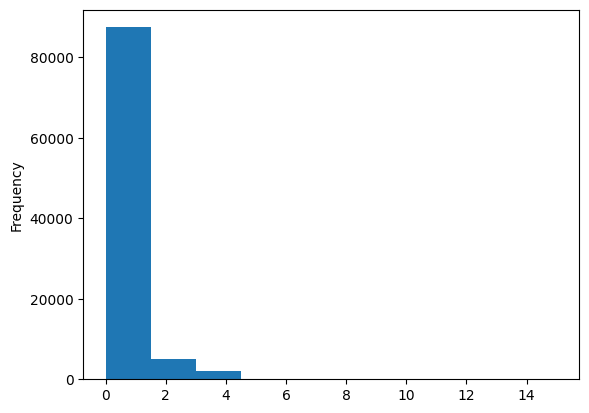

In [ ]:
df["number_of_persons_injured"].plot.hist()

In [ ]:
px.histogram(df, x="number_of_persons_injured")

In [ ]:
temp= df["number_of_persons_injured"].value_counts()
px.bar(temp)


# Finding 1: Date, Time, Death & Injury

1. What is the trend of motor vehicle collisions over time?

2. Are there more collisions in certain boroughs?

In [ ]:
gropy_df=df.groupby("crash_date_month", as_index=False)["number_of_persons_injured"].sum()
px.line(gropy_df, x="crash_date_month", y="number_of_persons_injured", title="The number of injured over months")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94875 entries, 0 to 103812
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   crash_date                     94875 non-null  datetime64[ns]
 1   crash_time                     94875 non-null  datetime64[ns]
 2   latitude                       94875 non-null  float64       
 3   longitude                      94875 non-null  float64       
 4   location                       94875 non-null  object        
 5   on_street_name                 67746 non-null  object        
 6   number_of_persons_injured      94875 non-null  int64         
 7   number_of_persons_killed       94875 non-null  int64         
 8   number_of_pedestrians_injured  94875 non-null  int64         
 9   number_of_pedestrians_killed   94875 non-null  int64         
 10  number_of_cyclist_injured      94875 non-null  int64         
 11  number_of_cycl

In [ ]:
gropy2_df=df.groupby("crash_date_month", as_index=False)["number_of_persons_killed"].sum()
px.bar(gropy2_df, x="crash_date_month", y="number_of_persons_killed", title="The number of persons killed", text="crash_date_month")
#Horizontal Exes
#gropy2_df=df.groupby("crash_date_month", as_index=False)["number_of_persons_killed"].sum()
#px.bar(gropy2_df, x="crash_date_month", y="number_of_persons_killed", orientation = "h", title="The number of persons killed")

In [ ]:
gropy_df=df.groupby("crash_date_month", as_index=False)["number_of_persons_injured"].sum()
fig=px.line(gropy_df, x="crash_date_month", y="number_of_persons_injured", title="The number of injured over months")

for trace in fig.data:
  trace.mode="markers+lines"
fig.update_xaxes(title_text="Month")
fig.update_yaxes(title_text="The Number of injured Persons")
fig.write_html("Text HTML")
fig.show()

# Finding 2: Date, Time & Crash Numbers

In [ ]:
gropy_df=df.groupby("crash_date_month", as_index=False)["collision_id"].count()
px.bar(gropy_df, x="crash_date_month", y="collision_id", text="collision_id")

In [ ]:
gropy_df=df.groupby("crash_date_month", as_index=False)["collision_id"].count()
px.line(gropy_df, x="crash_date_month", y="collision_id", text="collision_id")

In [ ]:
gropy_df=df.groupby(["crash_date_month","borough"], as_index=False)["collision_id"].count()
px.bar(gropy_df, x="crash_date_month", y="collision_id", color="borough",text="collision_id")

In [ ]:
gropy_df=df.groupby(["crash_date_month","borough"], as_index=False)["collision_id"].count()
px.bar(gropy_df, x="crash_date_month", y="collision_id", color="borough",text="collision_id", barmode="group")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94875 entries, 0 to 103812
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   crash_date                     94875 non-null  datetime64[ns]
 1   crash_time                     94875 non-null  datetime64[ns]
 2   latitude                       94875 non-null  float64       
 3   longitude                      94875 non-null  float64       
 4   location                       94875 non-null  object        
 5   on_street_name                 67746 non-null  object        
 6   number_of_persons_injured      94875 non-null  int64         
 7   number_of_persons_killed       94875 non-null  int64         
 8   number_of_pedestrians_injured  94875 non-null  int64         
 9   number_of_pedestrians_killed   94875 non-null  int64         
 10  number_of_cyclist_injured      94875 non-null  int64         
 11  number_of_cycl

In [ ]:
gropy_df=df.groupby(["crash_time_hour","borough"], as_index=False)["collision_id"].count()
px.bar(gropy_df, x="crash_time_hour", y="collision_id", color="borough",text="collision_id", barmode="group")

# Finding 3: Contributing Factors & Vehicle Type

## 3.1 Contributing Factor

What are the most common contributing factors to collisions?

In [ ]:
#df["contributing_factor_vehicle_3"].value_counts()
contributing_factors=pd.concat([
    df["contributing_factor_vehicle_1"],
    df["contributing_factor_vehicle_2"],
    df["contributing_factor_vehicle_3"],
    df["contributing_factor_vehicle_4"],
    df["contributing_factor_vehicle_5"],
])

#contributing_factors #94875
#Remove the Unspecified value
contributing_factors=contributing_factors.value_counts().reset_index()
contributing_factors=contributing_factors[contributing_factors['index']!='Unspecified']
contributing_factors.columns=['factors', 'count']
px.bar(contributing_factors.head(10), x="factors", y="count", text="count")
#contributing_factors.value_counts()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94875 entries, 0 to 103812
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   crash_date                     94875 non-null  datetime64[ns]
 1   crash_time                     94875 non-null  datetime64[ns]
 2   latitude                       94875 non-null  float64       
 3   longitude                      94875 non-null  float64       
 4   location                       94875 non-null  object        
 5   on_street_name                 67746 non-null  object        
 6   number_of_persons_injured      94875 non-null  int64         
 7   number_of_persons_killed       94875 non-null  int64         
 8   number_of_pedestrians_injured  94875 non-null  int64         
 9   number_of_pedestrians_killed   94875 non-null  int64         
 10  number_of_cyclist_injured      94875 non-null  int64         
 11  number_of_cycl

In [ ]:
#Vehicle Type Code
vehicle_types=pd.concat([
    df["vehicle_type_code1"],
    df["vehicle_type_code2"],
    df["vehicle_type_code_3"],
    df["vehicle_type_code_4"],
    df["vehicle_type_code_5"],
])

vehicle_types=vehicle_types.value_counts().reset_index()
vehicle_types.columns=['Vehicle Type', 'count']
px.bar(vehicle_types.head(10), x="Vehicle Type", y="count", text="count")


## 3.2 Vehicle Type

Are certain types of vehicles more likely to be involved in collisions?

In [ ]:
fig=px.density_mapbox(df,
                      lat='latitude',
                      lon='longitude',
                      z='TOTAL INJURIES AND FATALITIES',
                      redious=10,
                      hover_name='location',
                      hover_date=['crash_']
)

# Finding 4: Mapping Collision Hotspots